I have a dataset which has a feature for the crops.Here,I will try to use this data to create a model which tries to predict that which climatic and soil condition is useful to grow the particular crops which will help the farmers to adopt the modern farming and increase the productivity. I will use logistic regression(classification) algorithm and KMeans clustering algorithm.

#  Imports

In [2]:
#for manupulation
import numpy as np
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for interactive analysis
from ipywidgets import interact

# Data Importing

In [3]:
data=pd.read_csv("data.csv")

# Exploring the Dataset

In [4]:
print("shape of the datasets:",data.shape)

shape of the datasets: (2200, 8)


In [5]:
#first 5 rows of data
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Data Exploration

In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
#to find the unique values in the column
data['label'].value_counts()

muskmelon      100
cotton         100
maize          100
kidneybeans    100
coconut        100
mango          100
mothbeans      100
coffee         100
mungbean       100
watermelon     100
rice           100
apple          100
blackgram      100
banana         100
lentil         100
pigeonpeas     100
pomegranate    100
papaya         100
chickpea       100
grapes         100
orange         100
jute           100
Name: label, dtype: int64

In [8]:
#to find average climatic and soil condition
print("average rate of nitrogen in the soil:",data['N'].mean())
print("average rate of phosphorus in the soil:",data['P'].mean())
print("average rate of potassium in the soil:",data['K'].mean())
print("average temperature in the soil:",data['temperature'].mean())
print("relative humidity is:",data['humidity'].mean())
print("average rate of ph of soil:",data['ph'].mean())
print("average rate of rainfall is soil:",data['rainfall'].mean())

average rate of nitrogen in the soil: 50.551818181818184
average rate of phosphorus in the soil: 53.36272727272727
average rate of potassium in the soil: 48.14909090909091
average temperature in the soil: 25.616243851779533
relative humidity is: 71.48177921778648
average rate of ph of soil: 6.469480065256369
average rate of rainfall is soil: 103.4636554157683


In [11]:
#lets check a summary of all crops
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']== crops]
    print("----------------------------------------------------------")
    print("statistics for nitrogen")
    print("minimum nitrogen required:",x['N'].min())
    print("average nitrogen required:",x['N'].mean())
    print("maximum nitrogen required:",x['N'].max())
    print("----------------------------------------------------------")
    print("statistics for phosphorus")
    print("minimum phosphorus required:",x['P'].min())
    print("average phosphorus required:",x['P'].mean())
    print("maximum phosphorus required:",x['P'].max())
    print("-----------------------------------------------------------")
    print("statistics for potassium")
    print("minimum potassium required:",x['K'].min())
    print("averrage potassium required:",x['K'].mean())
    print("maximum potassium required:",x['K'].max())
    print("------------------------------------------------------------")
    print("statistics for temperature")
    print("minimum nitrogen required:",x['temperature'].min())
    print("average nitrogen required:",x['temperature'].mean())
    print("maximum nitrogen required:",x['temperature'].max())
    print("-------------------------------------------------------------")
    print("statistics for humidity")
    print("minimum humidity required:",x['humidity'].min())
    print("average humidity required:",x['humidity'].mean())
    print("maximum humidity required:",x['humidity'].max())
    print("-------------------------------------------------------------")
    print("statistics for ph")
    print("minimum ph required:",x['ph'].min())
    print("average ph required:",x['ph'].mean())
    print("maximum ph required:",x['ph'].max())
    print("--------------------------------------------------------------")
    print("statistics for rainfall")
    print("minimum rainfall required:",x['rainfall'].min())
    print("average rainfall required:",x['rainfall'].mean())
    print("maximum rainfall required:",x['rainfall'].max())
    

interactive(children=(Dropdown(description='crops', options=('muskmelon', 'cotton', 'maize', 'kidneybeans', 'c…

In [9]:
#lets check the summary of each crops
@interact
def compare(conditions =['N','P','K','temperature','ph','humidity','rainfall']):
    print("average value for",conditions,"is",data[conditions].mean())
    print("Rice:",data[(data['label']=='rice')][conditions].mean())
    print("Black gram:",data[(data['label']=='blackgram')][conditions].mean())
    print("Banana:",data[(data['label']=='banana')][conditions].mean())
    print("Jute:",data[(data['label']=='jute')][conditions].mean())
    print("Coconut:",data[(data['label']=='coconut')][conditions].mean())
    print("Apple:",data[(data['label']=='apple')][conditions].mean())
    print("Papaya:",data[(data['label']=='papaya')][conditions].mean())
    print("Musk melon:",data[(data['label']=='muskmelon')][conditions].mean())
    print("Grape:",data[(data['label']=='grapes')][conditions].mean())
    print("Watermelon:",data[(data['label']=='watermelon')][conditions].mean())
    print("Kidneybeans:",data[(data['label']=='kidneybeans')][conditions].mean())
    print("Mothbeans:",data[(data['label']=='mothbeans')][conditions].mean())
    print("Orange:",data[(data['label']=='orange')][conditions].mean())
    print("Lentil:",data[(data['label']=='lentil  ')][conditions].mean())
    print("Coffee:",data[(data['label']=='coffee')][conditions].mean())
    print("Mungbean:",data[(data['label']=='mungbean')][conditions].mean())
    print("Pomegranate:",data[(data['label']=='pomegranate')][conditions].mean())
    print("Chickpea:",data[(data['label']=='chickpea')][conditions].mean())
    print("Cotton",data[(data['label']=='cotton')][conditions].mean())
    print("Pigeonpeas:",data[(data['label']=='pigeonpeas')][conditions].mean())
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [10]:
@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average",conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("-------------------------------------------------------------------")
    print("Crops which require less than average",conditions,'\n')
    print(data[data[conditions] < data[conditions].mean()]['label'].unique())
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

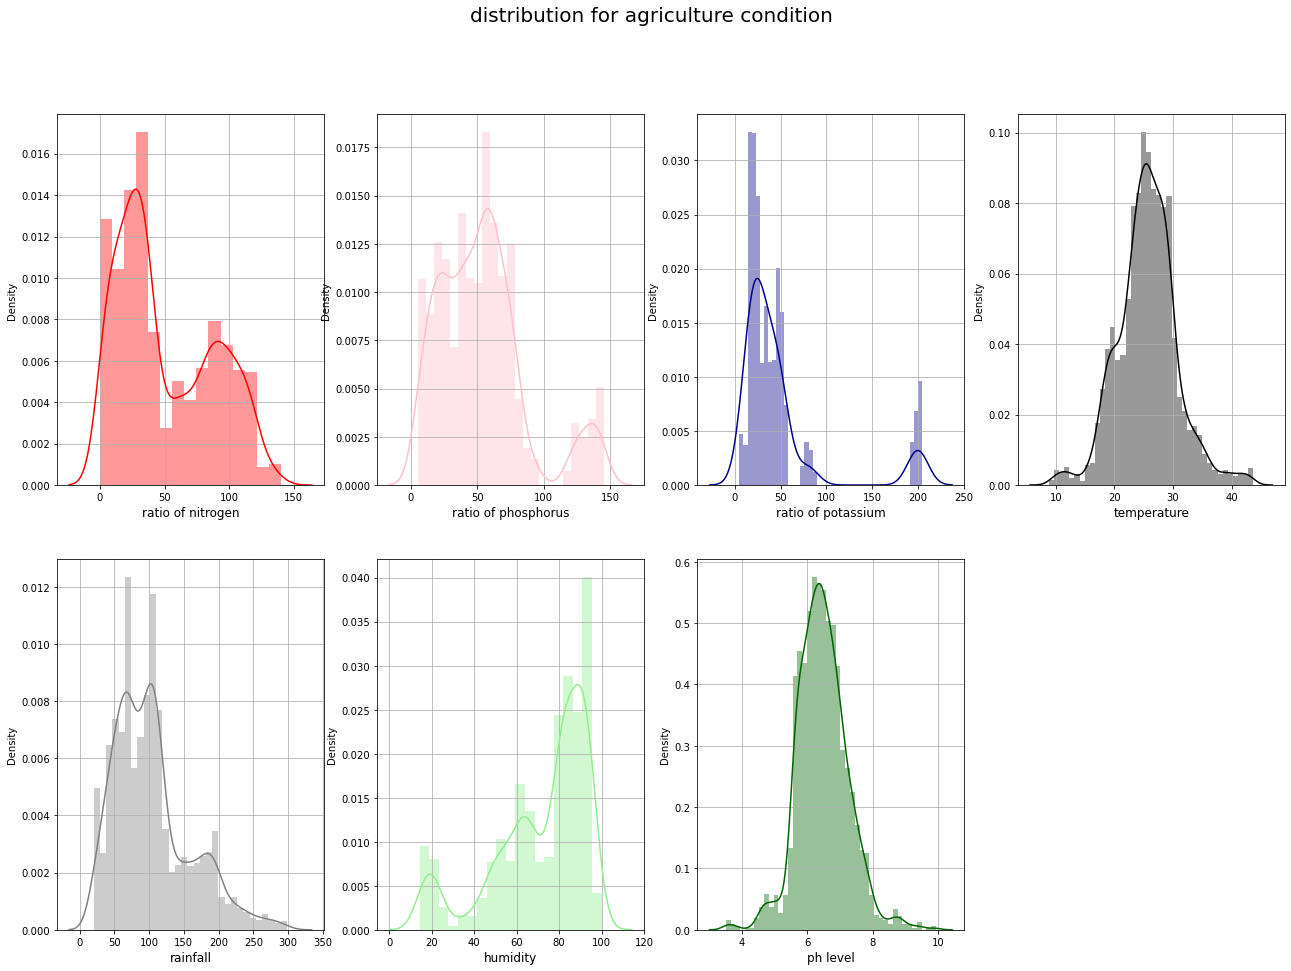

In [11]:
#visualization
plt.figure(figsize=(22,15))
plt.subplot(2,4,1)
sns.distplot(data['N'],color='red')
plt.xlabel('ratio of nitrogen',fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'],color='pink')
plt.xlabel('ratio of phosphorus',fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'],color='darkblue')
plt.xlabel('ratio of potassium',fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'],color='black')
plt.xlabel('temperature',fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['rainfall'],color='grey')
plt.xlabel('rainfall',fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['humidity'],color='lightgreen')
plt.xlabel('humidity',fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['ph'],color='darkgreen')
plt.xlabel('ph level',fontsize=12)
plt.grid()



plt.suptitle("distribution for agriculture condition",fontsize=20)
plt.show()

In [23]:
print("some interesting patterns")
print("-----------------------------------------")
print("crops which required very high ratio of nitrogen content in soil:",data[data['N']>120]['label'].unique())
print("crops which required very high ratio of phosphorus content in soil:",data[data['P']>120]['label'].unique())
print("crops which required very high ratio of potassium content in soil:",data[data['K']>120]['label'].unique())
print("crops which required high rainfall:",data[data['rainfall']>200]['label'].unique())
print("crops which required very high temperature:",data[data['temperature']>40]['label'].unique())
print("crops which required very low temperature:",data[data['temperature']<10]['label'].unique())
print("crops which required very low humidity:",data[data['humidity']<20]['label'].unique())
print("crops which required very low ph:",data[data['ph']<4]['label'].unique())
print("crops which required very high ph:",data[data['ph']>9]['label'].unique())

some interesting patterns
-----------------------------------------
crops which required very high ratio of nitrogen content in soil: ['cotton']
crops which required very high ratio of phosphorus content in soil: ['grapes' 'apple']
crops which required very high ratio of potassium content in soil: ['grapes' 'apple']
crops which required high rainfall: ['rice' 'papaya' 'coconut']
crops which required very high temperature: ['grapes' 'papaya']
crops which required very low temperature: ['grapes']
crops which required very low humidity: ['chickpea' 'kidneybeans']
crops which required very low ph: ['mothbeans']
crops which required very high ph: ['mothbeans']


In [24]:
print("summer crops")
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print("------------------------------------------------------------------------")
print("winter cropS")
print(data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print("------------------------------------------------------------------------")
print("rainy cropS")
print(data[(data['rainfall']>200) & (data['humidity']>20)]['label'].unique())

summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------
winter cropS
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------
rainy cropS
['rice' 'papaya' 'coconut']


# KMeans Clustering Algorithm

In [25]:
from sklearn.cluster import KMeans
x=data.drop(['label'],axis=1)
x=x.values
print(x.shape)

(2200, 7)


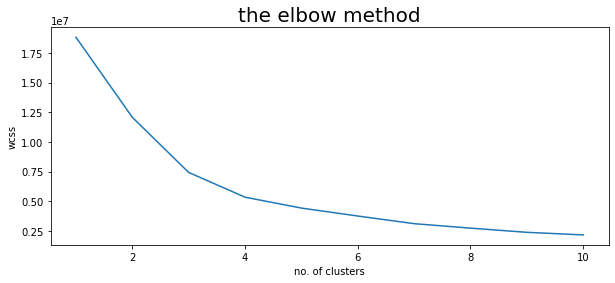

In [26]:
plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("the elbow method",fontsize=20)
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.show()

In [27]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})
print("lets check the result after applying the k means clustring analysis\n")
print("crops in first cluster:",z[z['cluster']==0]['label'].unique())
print("crops in second cluster:",z[z['cluster']==1]['label'].unique())
print("crops in third cluster:",z[z['cluster']==2]['label'].unique())
print("crops in fourth cluster:",z[z['cluster']==3]['label'].unique())

lets check the result after applying the k means clustring analysis

crops in first cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
crops in second cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
crops in third cluster: ['grapes' 'apple']
crops in fourth cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


# Creating Model

In [28]:
y=data['label']
x=data.drop(['label'],axis=1)
print("shape of x:",x.shape)
print("shape of y:",y.shape)

shape of x: (2200, 7)
shape of y: (2200,)


I will split our data. 80% of data will be train data and 20% of it will be test data.

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("shape of x train:",x_train.shape)
print("shape of x test:",x_test.shape)
print("shape of y train:",y_train.shape)
print("shape of y test:",y_test.shape)

shape of x train: (1760, 7)
shape of x test: (440, 7)
shape of y train: (1760,)
shape of y test: (440,)


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion Matrix 

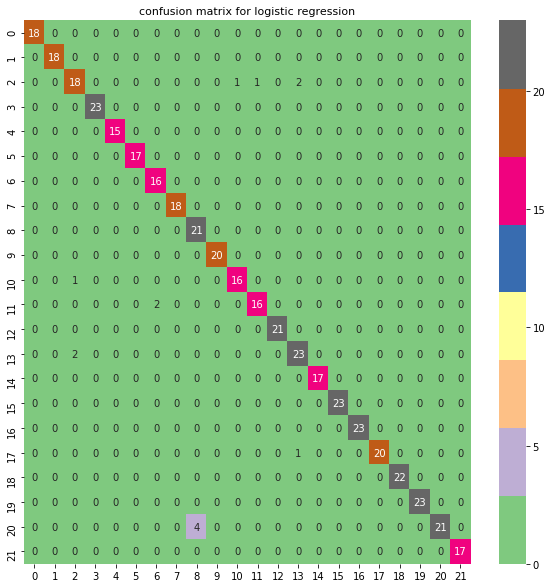

In [32]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Accent')
plt.title("confusion matrix for logistic regression",fontsize=11)
plt.show()

# Classification Report 

In [33]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [34]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [35]:
prediction=model.predict((np.array([[90,
                                    40,
                                    40,
                                    20,
                                    80,
                                    7,
                                    200]])))
print("suggest the crop for given climatic condition is : ",prediction)

suggest the croop for given climatic condition is :  ['rice']
